In [270]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [271]:
data=pd.read_csv("sales_data.csv")
data

,Unnamed: 0,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,FIRST_ORDER_DATE,LATEST_ORDER_DATE,AVGDAYSBETWEENORDERS,DAYSSINCELASTORDER
0,22,124,11986.54,96.67,529.59,4.27,30-Dec-16,24-Oct-21,14.19,1
1,29,82,11025.96,134.46,97.92,1.19,31-Mar-18,24-Oct-21,15.89,1
2,83,43,7259.69,168.83,171.69,3.99,30-Nov-17,24-Oct-21,33.12,1
3,95,44,6992.27,158.92,92.82,2.11,09-Apr-19,24-Oct-21,21.11,1
4,124,55,6263.44,113.88,179.04,3.26,23-Oct-20,24-Oct-21,6.65,1
...,...,...,...,...,...,...,...,...,...,...
4995,173946,1,117.49,117.49,4.99,4.99,01-Apr-21,01-Apr-21,0.00,207
4996,173987,1,117.49,117.49,4.99,4.99,01-Apr-21,01-Apr-21,0.00,207
4997,174004,1,117.49,117.49,4.99,4.99,01-Apr-21,01-Apr-21,0.00,207
4998,174038,1,117.49,117.49,4.99,4.99,01-Apr-21,01-Apr-21,0.00,207


In [272]:
data.drop_duplicates(inplace=True)

In [273]:
data.isnull().sum()

Unnamed: 0              0
TOTAL_ORDERS            0
REVENUE                 0
AVERAGE_ORDER_VALUE     0
CARRIAGE_REVENUE        0
AVERAGESHIPPING         0
FIRST_ORDER_DATE        0
LATEST_ORDER_DATE       0
AVGDAYSBETWEENORDERS    0
DAYSSINCELASTORDER      0
dtype: int64

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            5000 non-null   int64  
 1   TOTAL_ORDERS          5000 non-null   int64  
 2   REVENUE               5000 non-null   float64
 3   AVERAGE_ORDER_VALUE   5000 non-null   float64
 4   CARRIAGE_REVENUE      5000 non-null   float64
 5   AVERAGESHIPPING       5000 non-null   float64
 6   FIRST_ORDER_DATE      5000 non-null   object 
 7   LATEST_ORDER_DATE     5000 non-null   object 
 8   AVGDAYSBETWEENORDERS  5000 non-null   float64
 9   DAYSSINCELASTORDER    5000 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 429.7+ KB


In [275]:
data['LATEST_ORDER_DATE'] = pd.to_datetime(data['LATEST_ORDER_DATE'])
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'])

data["Number_year_customer"] = data['LATEST_ORDER_DATE'].dt.year - data['FIRST_ORDER_DATE'].dt.year

In [276]:
col=["FIRST_ORDER_DATE","LATEST_ORDER_DATE","Unnamed: 0","DAYSSINCELASTORDER"]
data.drop(col,axis=1,inplace=True)

In [277]:
data.describe()

,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,Number_year_customer
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,12.87040,1681.523840,136.537378,46.036376,3.592574,163.159618,2.868800
std,12.67988,1998.618678,91.651569,47.879226,2.021360,259.699496,2.578937
min,1.00000,38.500000,10.680000,0.000000,0.000000,0.000000,0.000000
25%,3.00000,315.097500,83.025000,9.980000,2.500000,21.670000,1.000000
50%,8.00000,966.725000,113.160000,24.985000,3.660000,57.635000,2.000000
75%,20.00000,2493.072500,160.272500,76.862500,4.790000,170.357500,5.000000
max,156.00000,34847.400000,1578.880000,529.590000,35.990000,1409.500000,7.000000


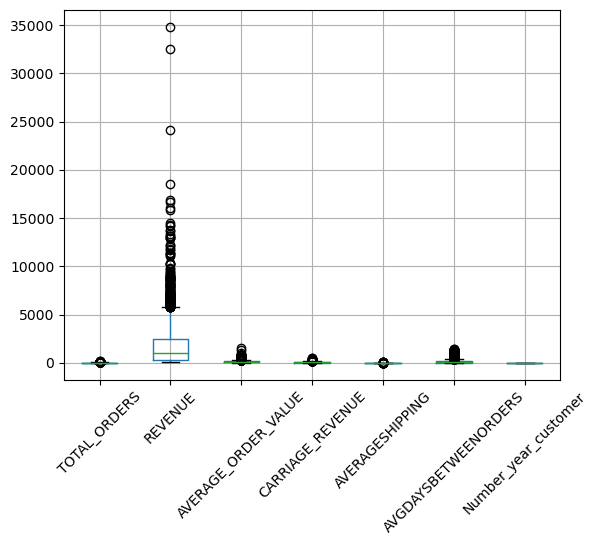

In [278]:
data.boxplot()
plt.xticks(rotation=45)
plt.show()

In [279]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df[((df >= lower_bound) & (df <= upper_bound)).all(axis=1)]

    return df_no_outliers


In [280]:
df = remove_outliers_iqr(data)
df.shape

(3853, 7)

In [281]:
df.columns

Index(['TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE',
       'AVERAGESHIPPING', 'AVGDAYSBETWEENORDERS', 'Number_year_customer'],
      dtype='object')

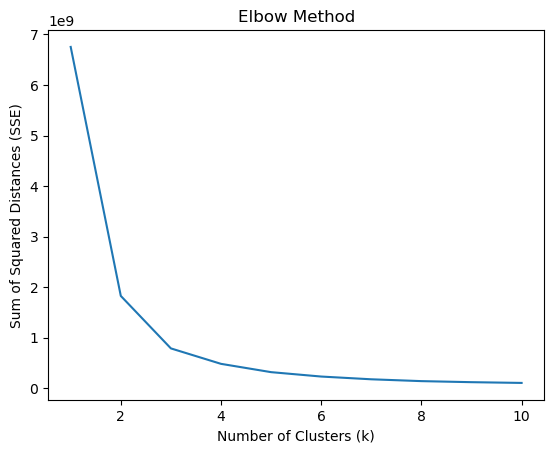

In [282]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data frame
# ...

# Select the numerical columns for clustering
columns_for_clustering = ['TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE',
                          'AVERAGESHIPPING', 'AVGDAYSBETWEENORDERS', 'Number_year_customer']

# Compute SSE for different values of k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[columns_for_clustering])
    sse.append(kmeans.inertia_)

# Plot SSE values against k values
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method')
plt.show()


In [283]:
import sklearn.metrics as metrics
for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
+str(metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.6397224577251627
Silhouette score for k(clusters) = 3 is 0.6298895263251385
Silhouette score for k(clusters) = 4 is 0.6154645609273686
Silhouette score for k(clusters) = 5 is 0.5797242263123937
Silhouette score for k(clusters) = 6 is 0.550466259888206
Silhouette score for k(clusters) = 7 is 0.5416828665007067
Silhouette score for k(clusters) = 8 is 0.5217245159968068
Silhouette score for k(clusters) = 9 is 0.487386198035563
Silhouette score for k(clusters) = 10 is 0.4748447585742079
Silhouette score for k(clusters) = 11 is 0.441169182347151
Silhouette score for k(clusters) = 12 is 0.4140863590050867


In [284]:
columns_for_clustering = ['TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE',
                          'AVERAGESHIPPING', 'AVGDAYSBETWEENORDERS', 'Number_year_customer']

k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(df[columns_for_clustering])

# Add cluster labels to the data frame
df['Cluster'] = kmeans.labels_

# Print the resulting data frame with cluster labels
df.head()

C:\Users\Vaidees\AppData\Local\Temp\ipykernel_16068\2325807807.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,CARRIAGE_REVENUE,AVERAGESHIPPING,AVGDAYSBETWEENORDERS,Number_year_customer,Cluster
6,43,5470.27,127.22,128.77,2.99,23.58,2,1
8,19,4967.06,261.42,51.91,2.73,12.37,0,1
9,21,4726.38,225.07,63.88,3.04,31.29,1,1
10,37,3934.05,106.33,162.50,4.39,70.59,7,1
11,20,3933.82,196.69,74.87,3.74,111.55,6,1


In [285]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',"principal component 3"])
pca_df.head()

,principal component 1,principal component 2,principal component 3
0,3967.369080,-20.267104,-42.062834
1,3464.522869,-28.830491,115.415458
2,3223.520639,-14.109547,77.471245
3,2431.698451,7.861248,-68.876057
4,2430.334268,56.267222,47.144813


In [286]:
K=range(2,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

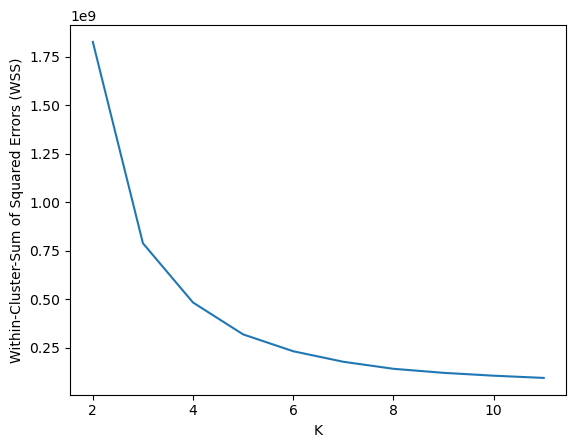

In [287]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)
plt.show()

In [288]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


# Select the numerical columns for clustering
columns_for_clustering = ['TOTAL_ORDERS', 'REVENUE', 'AVERAGE_ORDER_VALUE', 'CARRIAGE_REVENUE',
                          'AVERAGESHIPPING', 'AVGDAYSBETWEENORDERS', 'Number_year_customer']

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_for_clustering])

# Apply DBSCAN
eps = 0.3  # Maximum distance between samples to be considered in the same neighborhood
min_samples = 2  # Minimum number of samples required to form a dense region
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(scaled_data)

# Add cluster labels to the data frame
df['Cluster'] = dbscan.labels_

# Print the resulting data frame with cluster labels
print(df.head())


    TOTAL_ORDERS  REVENUE  AVERAGE_ORDER_VALUE  CARRIAGE_REVENUE  \
6             43  5470.27               127.22            128.77   
8             19  4967.06               261.42             51.91   
9             21  4726.38               225.07             63.88   
10            37  3934.05               106.33            162.50   
11            20  3933.82               196.69             74.87   

    AVERAGESHIPPING  AVGDAYSBETWEENORDERS  Number_year_customer  Cluster  
6              2.99                 23.58                     2       -1  
8              2.73                 12.37                     0       -1  
9              3.04                 31.29                     1       -1  
10             4.39                 70.59                     7       -1  
11             3.74                111.55                     6       -1  


C:\Users\Vaidees\AppData\Local\Temp\ipykernel_16068\4140702422.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = dbscan.labels_
